importing dependencies

In [3]:
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [4]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

In [5]:
type(X_train)

numpy.ndarray

In [6]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_train.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (60000,)


In [7]:
print(X_train[10])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [8]:
print(X_train[10].shape)

(28, 28)


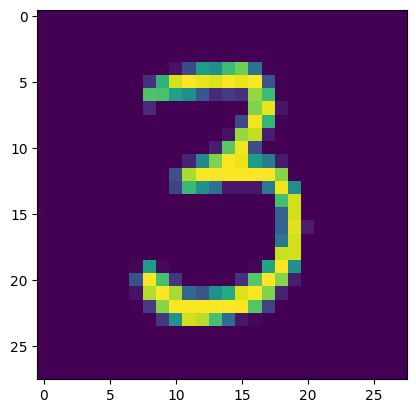

In [9]:
plt.imshow(X_train[50])
plt.show()

In [10]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
#scaling the pixels
X_train=X_train/255
X_test=X_test/255


In [12]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

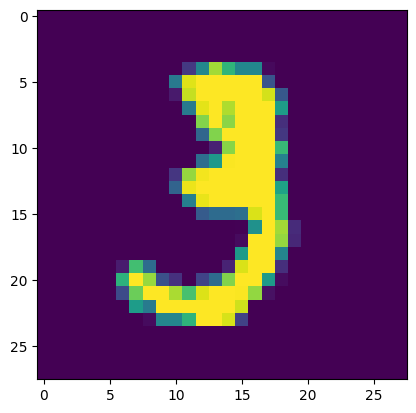

In [13]:
plt.imshow(X_train[10])

In [14]:
#Building a neural network

In [15]:
#setting up the layers for the neural network

model= keras.Sequential([
    keras.layers.Conv2D(filter=32,kernel_size=(3,3),activation='relu',input_shape=((28,28,1)))
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),

])

In [18]:
#compiling the neural network

model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [19]:
#training the model

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2971 - accuracy: 0.9126
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1366 - accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0834 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0697 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0520 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0399 - accuracy: 0.9872
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.035

In [20]:
#Accuracy on test data

loss,accuracy = model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9760


In [21]:
Y_pred=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


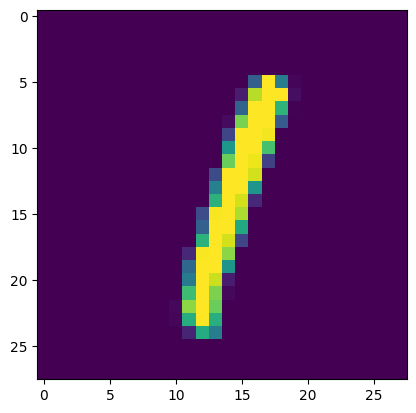

In [22]:
plt.imshow(X_test[5])

In [23]:
print(Y_test[5],Y_pred[5])

1 [1.0063282e-03 9.9996221e-01 2.5415653e-03 4.1901793e-02 1.7676523e-01
 4.2213807e-03 1.2283155e-04 9.6833962e-01 1.2692586e-01 6.8706954e-03]


In [24]:
Y_test.shape


(10000,)

In [25]:
Y_pred.shape

(10000, 10)

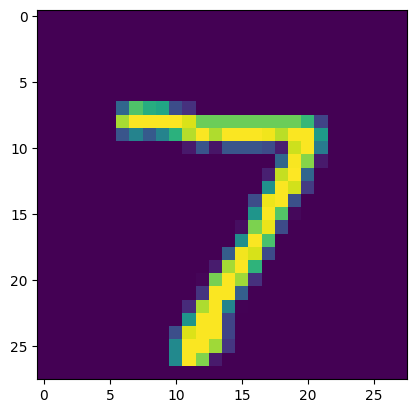

In [30]:
plt.imshow(X_test[0])

In [26]:
Y_pred[0]

array([1.1600383e-04, 2.7107906e-02, 5.3122729e-01, 9.5495731e-01,
       2.4198008e-07, 5.6894338e-03, 5.9889075e-08, 9.9999601e-01,
       8.9804612e-02, 4.0327141e-01], dtype=float32)

model.predict() gives us the probabilty for each class the image can belong to

In [27]:
#converting the prediction probabilites to class label

lable_first_image=np.argmax(Y_pred[0])

In [28]:
print(lable_first_image)

7


In [38]:
y_pred=[]
for x in Y_pred:
  y_pred.append(np.argmax(x))


In [39]:
y_pred=np.array(y_pred)

In [40]:
y_pred.shape

(10000,)

In [41]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

Predicted lable: 4 


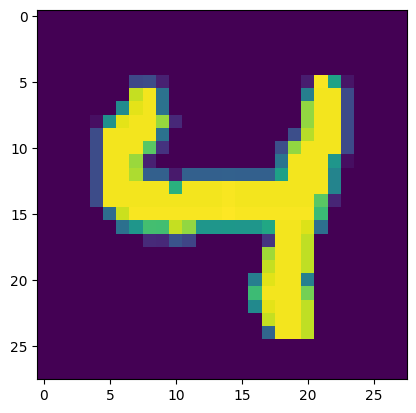

In [43]:
import random
ran=random.randint(0,10000)
plt.imshow(X_test[ran])
print(f"Predicted lable: {y_pred[ran]} ")

Confusion matrix

In [44]:
conf_mat=confusion_matrix(Y_test,y_pred)
print(conf_mat)

tf.Tensor(
[[ 965    1    1    1    1    5    2    1    3    0]
 [   0 1119    4    2    0    1    2    0    7    0]
 [   3    1 1006    6    2    0    3    6    4    1]
 [   0    0    3  985    0    6    0    5    6    5]
 [   0    1    5    0  960    0    2    1    0   13]
 [   2    0    0    6    1  865    3    1   12    2]
 [   3    3    2    2    3    7  929    0    9    0]
 [   1    2    7    0    0    0    0 1005    3   10]
 [   2    0    1    5    6    3    3    4  948    2]
 [   3    2    0    2   12    2    1    5    3  979]], shape=(10, 10), dtype=int32)


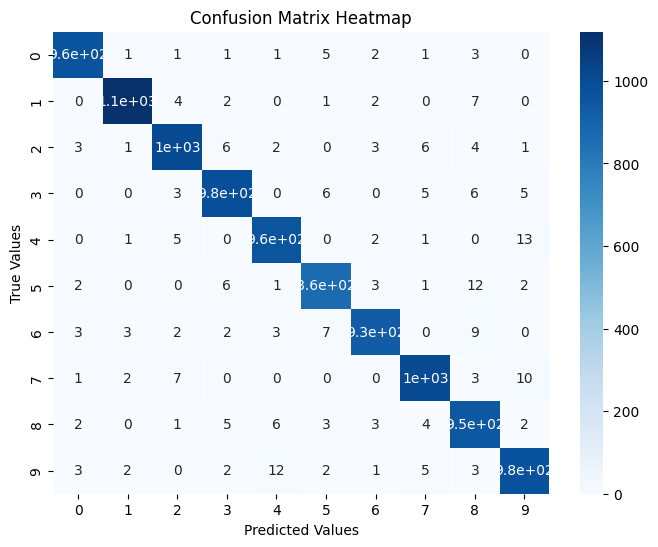

In [51]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True,cmap='Blues',xticklabels=np.unique(Y_test),yticklabels=np.unique(y_pred))
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [49]:
sns.heatmap?

In [ ]:
#Building a predictive system

input_img=

Object `tensorflow.keras.layers` not found.
